In [27]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('xAPI-Edu-Data.csv')
print(dataset.shape)

(480, 17)


In [15]:
dataset.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [16]:
fuzzy_features = dataset.drop(['StageID', 'gender', 'NationalITy', 'Semester', 'PlaceofBirth', 'GradeID', 'Topic', 'SectionID', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'], axis=1)
fuzzy_features.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [17]:
#Convert Pandas dataframe to numpy array
data = fuzzy_features.values
print(data.shape)
print(type(data))
print(data[453])

(480, 4)
<type 'numpy.ndarray'>
[29 78 40 12]


In [18]:
#Check unique values of all fuzzy variables

val0, count0 = np.unique(data[:,0], return_counts = True)
val1, count1 = np.unique(data[:,1], return_counts = True)
val2, count2 = np.unique(data[:,2], return_counts = True)
val3, count3 = np.unique(data[:,3], return_counts = True)

In [35]:
print(val0)
#print(count0)
print(val1)
#print(count1)
print(val2)
print(val3)
#Result: All variables have values between 0 to 100

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  27  28  29  30  32  33  35  36  39  40
  41  42  45  49  50  51  52  53  55  57  59  60  61  62  65  66  67  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  92  95  96  97  98  99 100]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 33 34 35 36 38 39 40 41 42 43 44 48 50 51 52 54 55
 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49
 50 51 52 53 54 55 56 57 58 59 60 62 63 64 65 66 67 69 70 71 72 73 74 75
 76 77 78 79 80 82 83 85 86 87 88 89 91 93 95 98]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 

In [36]:
#I have defined three different types of fuzzy templates. It does not necessarily represent the data in the best way possible.
#Fine tuning and interchanging of these templates between variables will be required later.
#Use this as a guide to create the rule base

a = np.arange(0, 101, 1)
rh_lo = fuzz.trapmf(a, [0, 0, 10, 30])
rh_avg = fuzz.trimf(a, [25, 50, 75])
rh_hi = fuzz.trapmf(a, [70, 90, 100, 100])

vr_lo = fuzz.trimf(a, [0, 0, 50])
vr_avg = fuzz.trimf(a, [25, 50, 75])
vr_hi = fuzz.trimf(a, [50, 100, 100])

av_lo = fuzz.trapmf(a, [0, 0, 25, 50])
av_avg = fuzz.trimf(a, [25, 50, 75])
av_hi = fuzz.trapmf(a, [50, 75, 100, 100])

d_lo = fuzz.trimf(a, [0, 25, 50])
d_avg = fuzz.trimf(a, [25, 50, 75])
d_hi = fuzz.trimf(a, [50, 75, 100])



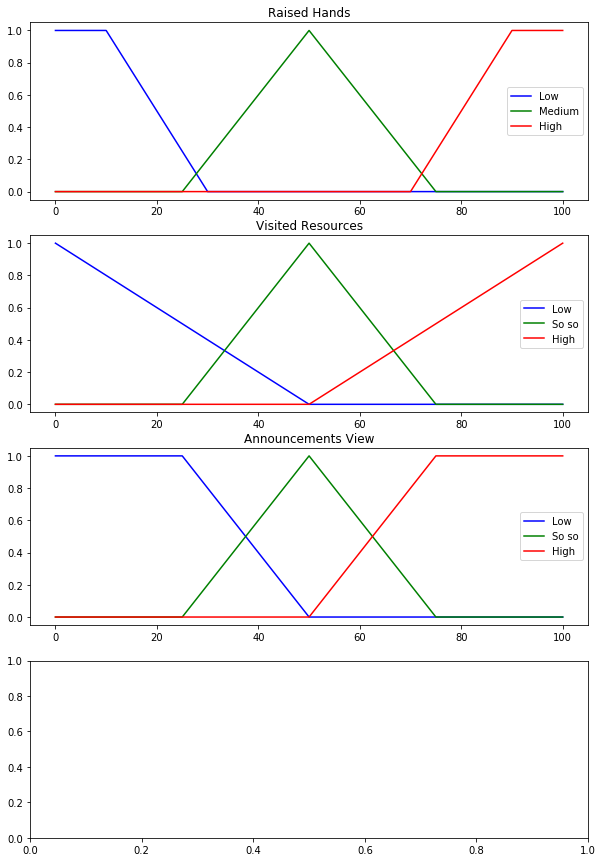

In [42]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(10, 15))

ax0.plot(a, rh_lo, 'b', linewidth=1.5, label = 'Low')
ax0.plot(a, rh_avg, 'g', linewidth=1.5, label = 'Medium')
ax0.plot(a, rh_hi, 'r', linewidth=1.5, label = 'High')
ax0.set_title('Raised Hands')
ax0.legend()

ax1.plot(a, vr_lo, 'b', linewidth=1.5, label='Low')
ax1.plot(a, vr_avg, 'g', linewidth=1.5, label='So so')
ax1.plot(a, vr_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('Visited Resources')
ax1.legend()

ax2.plot(a, av_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(a, av_avg, 'g', linewidth=1.5, label='So so')
ax2.plot(a, av_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Announcements View')
ax2.legend()

ax2.plot(a, av_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(a, av_avg, 'g', linewidth=1.5, label='So so')
ax2.plot(a, av_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Announcements View')
ax2.legend()


